<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Capstone Part 6:** Finding Missing Values


#### Student Author: Abigail Hedden

## Objectives


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Set-up


In [2]:
# import required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load in dataset

The functions below will download the dataset into your browser:



In [19]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Explore the Dataset

In [20]:
# display basic information and summary statistics of the dataset
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [21]:
# find missing values
missing_values = df.isnull().sum()
print(missing_values)
print('')

missing_values = missing_values[missing_values > 0]
print('Columns with missing values:')
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Columns with missing values:
RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


##### Visualize missing values using a heatmap (Using seaborn library).



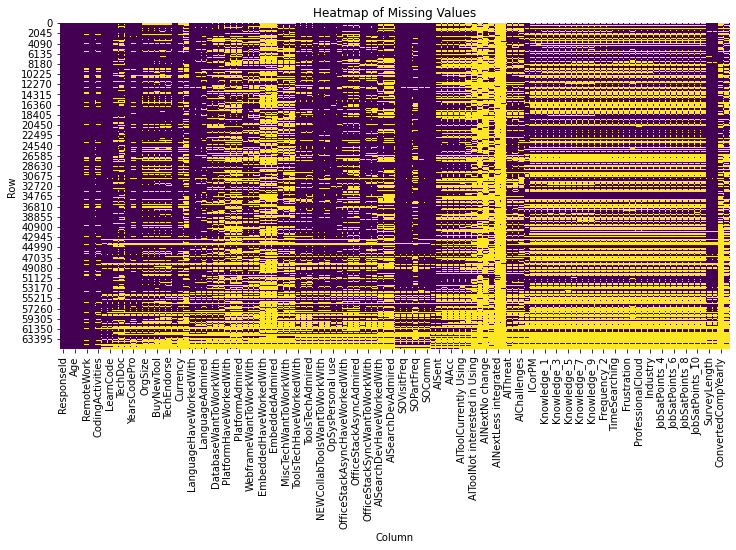

In [22]:
# plot missing data heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

#### Count the number of missing rows for a specific column (e.g., `Employment`).


In [23]:
missing_employment = df['Employment'].isnull().sum()
print(f"Number of missing rows in 'Employment': {missing_employment}")

Number of missing rows in 'Employment': 0


#### (Extra) Calculate and display the number of missing data for each column

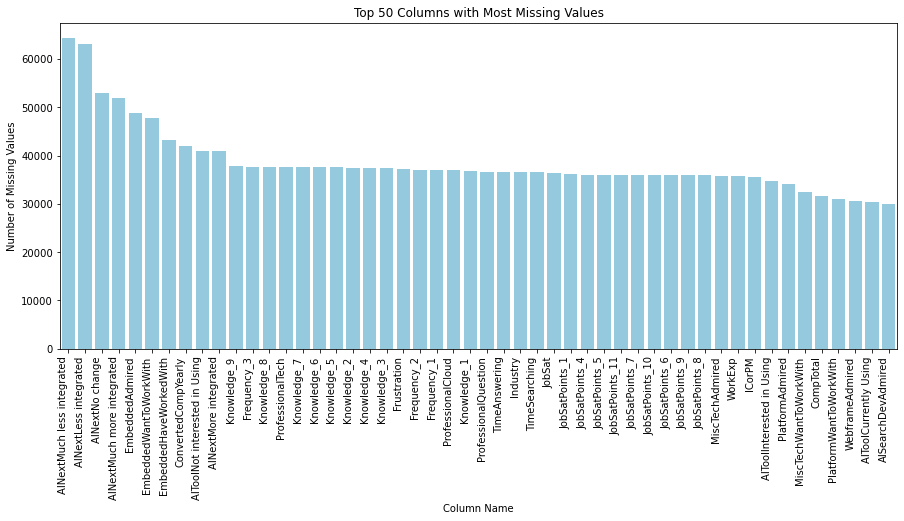

In [17]:
# calculate the number of missing values per column
missing = df.isnull().sum()
missing = missing[missing > 0]

# sort descending and select top 50 for plotting
missing_top50 = missing.sort_values(ascending=False).head(50)

# make bar plot
plt.figure(figsize=(15,6))
sns.barplot(x=missing_top50.index, y=missing_top50.values, color='skyblue')
plt.title('Top 50 Columns with Most Missing Values')
plt.xlabel('Column Name')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90, ha='right')
plt.show()

### Imputing Missing Values
#### Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [24]:
# calculate the most frequent value in the Employment column
most_frequent = df['Employment'].value_counts().idxmax()
print(f"The most frequent value in 'Employment' is: {most_frequent}")

The most frequent value in 'Employment' is: Employed, full-time


#### Impute missing values in the `Employment` column with the most frequent value.



In [25]:
# fill missing `Employment` values with the most frequent value
df['Employment'].fillna(most_frequent,inplace=True)

### Visualizing Imputed Data
#### Visualize the distribution of a column after imputation (e.g., `Employment`).


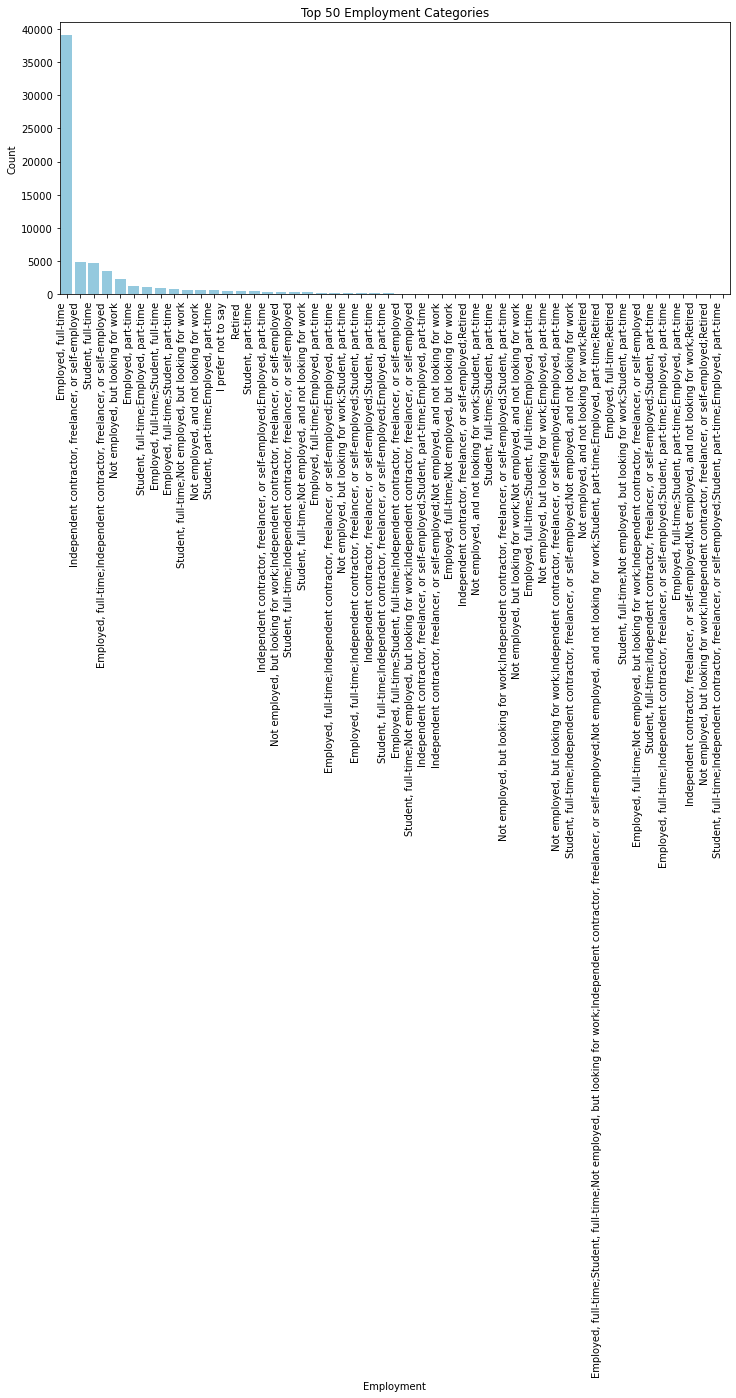

In [36]:
# sort descending and select top 50 for plotting
employment_counts = df['Employment'].value_counts()
top50_categories = employment_counts.head(50).index
df_top50 = df[df['Employment'].isin(top50_categories)]

# make plot
plt.figure(figsize=(12,5))
sns.countplot(
    x='Employment',
    data=df_top50,
    order=top50_categories,
    color='skyblue'
)
plt.title('Top 50 Employment Categories')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

# poor data variable for plotting

Copyright © IBM Corporation. All rights reserved.
